# 9.

Implementações Computacionais de Redes Neurais.

Para cada um dos problemas abaixo apresente a solução fazendo uso de redes. Apresente na solução a curva do erro de treinamento e o erro de validação:

## 9.1

Defina a estrutura de uma rede perceptron de múltiplas camadas para aproximar a função:

 $f(x) = 16x_1² + x_1x_2 + 8x_2² - x_1 - x_2 + ln(1 + x_1² + x_2²)$


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Função para gerar dados de treinamento
def generate_data(n_samples):
    np.random.seed(0)
    x1 = np.random.rand(n_samples) * 10 - 5
    x2 = np.random.rand(n_samples) * 10 - 5
    y = 16 * x1**2 + x1 * x2 + 8 * x2**2 - x1 - x2 + np.log(1 + x1**2 + x2**2)
    X = np.column_stack((x1, x2))
    return X, y.reshape(-1, 1)

# Gerando dados de treinamento
X_train, y_train = generate_data(1000)
X_val, y_val = generate_data(200)

# Definindo a arquitetura da rede
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo e acompanhando o erro de validação
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Epoch 1/1000
32/32 [==============================] - 1s 13ms/step - loss: 62505.0195 - val_loss: 59318.6602
Epoch 2/1000
32/32 [==============================] - 0s 8ms/step - loss: 62296.4141 - val_loss: 59132.4141
Epoch 3/1000
32/32 [==============================] - 0s 8ms/step - loss: 62099.3984 - val_loss: 58946.9336
Epoch 4/1000
32/32 [==============================] - 0s 8ms/step - loss: 61902.6172 - val_loss: 58758.0000
Epoch 5/1000
32/32 [==============================] - 0s 11ms/step - loss: 61697.7148 - val_loss: 58563.4336
Epoch 6/1000
32/32 [==============================] - 0s 10ms/step - loss: 61485.4570 - val_loss: 58359.8359
Epoch 7/1000
32/32 [==============================] - 0s 9ms/step - loss: 61257.7656 - val_loss: 58139.4453
Epoch 8/1000
32/32 [==============================] - 0s 8ms/step - loss: 61017.5625 - val_loss: 57900.0391
Epoch 9/1000
32/32 [==============================] - 0s 8ms/step - loss: 60759.6719 - val_loss: 57650.3750
Epoch 10/1000
32/32 [====

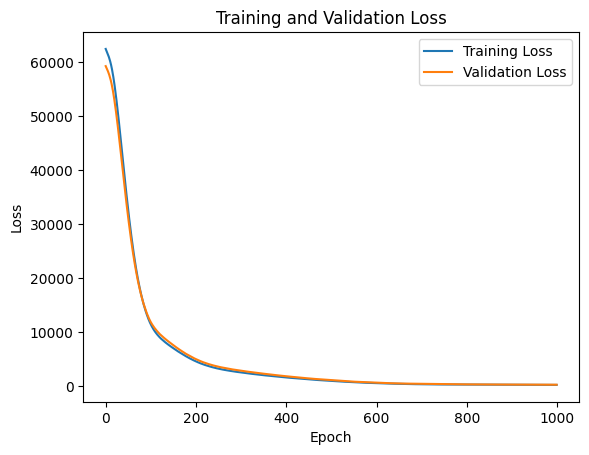

In [ ]:
# Plotando a curva do erro de treinamento e erro de validação
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Gerando novos dados para previsão
X_new, _ = generate_data(100)

# Calculando os valores reais de saída usando a função f(x) para os novos dados de entrada
y_real = np.zeros((len(X_new), 1))
for i in range(len(X_new)):
    x1, x2 = X_new[i]
    y_real[i] = 16 * x1**2 + x1 * x2 + 8 * x2**2 - x1 - x2 + np.log(1 + x1**2 + x2**2)

# Fazendo previsões usando o modelo treinado
y_pred = model.predict(X_new)

for i in range(10):
    print("Entrada:", X_new[i])
    print("Saída Real:", y_real[i])
    print("Saída Prevista:", y_pred[i])

4/4 [==============================] - 0s 2ms/step
Entrada: [0.48813504 1.77816537]
Saída Real: [29.19071224]
Saída Prevista: [18.976273]
Entrada: [ 2.15189366 -2.29992027]
Saída Real: [113.99687168]
Saída Prevista: [114.1291]
Entrada: [1.02763376 2.35194022]
Saída Real: [62.21336241]
Saída Prevista: [54.459335]
Entrada: [0.44883183 4.62188545]
Saída Real: [174.23785679]
Saída Prevista: [167.31696]
Entrada: [-0.76345201 -2.51246856]
Saída Real: [67.08607441]
Saída Prevista: [67.56934]
Entrada: [1.45894113 0.76157334]
Saída Real: [38.89730377]
Saída Prevista: [1.3459663]
Entrada: [-0.62412789  0.92041931]
Saída Real: [12.94419766]
Saída Prevista: [-4.498999]
Entrada: [3.91773001 0.72251906]
Saída Real: [250.76996543]
Saída Prevista: [257.3979]
Entrada: [ 4.63662761 -2.76918367]
Saída Real: [394.01969557]
Saída Prevista: [392.9813]
Entrada: [-1.16558481  4.52749012]
Saída Real: [180.21290886]
Saída Prevista: [175.88043]


313/313 [==============================] - 1s 3ms/step


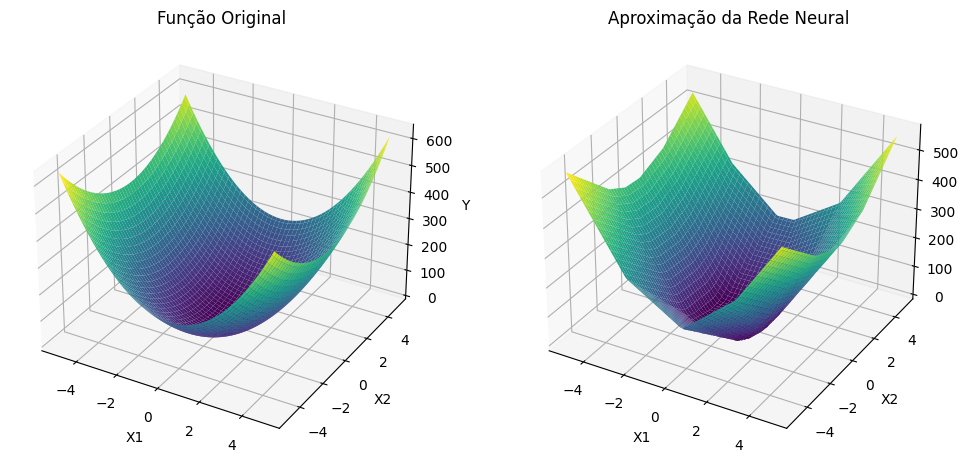

In [ ]:
# Função original
def original_function(x1, x2):
    return 16 * x1**2 + x1 * x2 + 8 * x2**2 - x1 - x2 + np.log(1 + x1**2 + x2**2)

# Gerando pontos para plotagem
x1_values = np.linspace(-5, 5, 100)
x2_values = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)
Z_original = original_function(X1, X2)

# Calculando a aproximação da rede neural
Z_approx = model.predict(np.vstack([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plotando
fig = plt.figure(figsize=(12, 6))

# Plot da função original
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X1, X2, Z_original, cmap='viridis')
ax1.set_title('Função Original')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')

# Plot da aproximação da rede neural
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X1, X2, Z_approx, cmap='viridis')
ax2.set_title('Aproximação da Rede Neural')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Y')

plt.show()


## 9.2

Considere o problema das espirais. Sendo a espiral 1 uma classe e a espiral 2 outra classe. Gere as curvas das espirais usando as seguintes equações:

- Espiral 1:

  $x = \frac{\theta}{4}cos(\theta), ~y = \frac{\theta}{4}sen(\theta), ~\theta \geq 0$

- Espiral 2:

  $x = (\frac{\theta}{4} + 0.8)cos(\theta), ~y = (\frac{\theta}{4} + 0.8)sen(\theta), ~\theta \geq 0$

Solucione este problema utilizando uma rede perceptron de múltiplas camadas. Gere a partir das equações os dados para treinamento e teste. Determine a **matriz de confusão**.

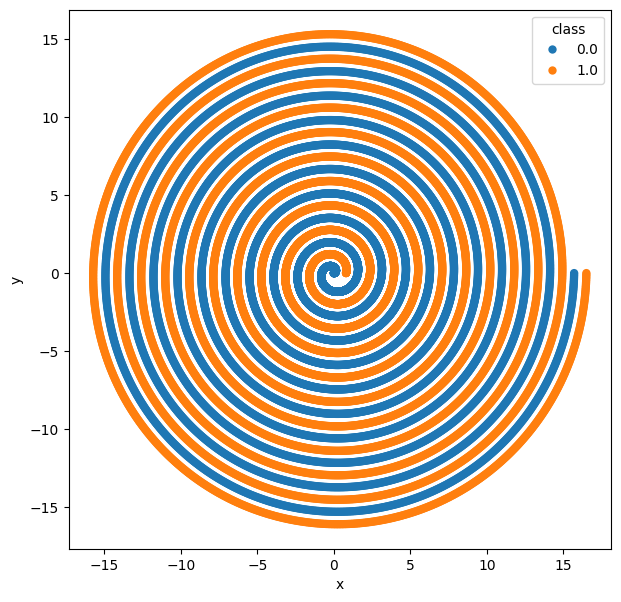

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.neural_network  import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix
from mlxtend.plotting        import plot_decision_regions

# Função para gerar os dados das espirais
def generate_spiral_data(num_points):
    theta = np.linspace(0, 20 * np.pi, num_points)

    x0 = (theta / 4) * np.cos(theta)
    y0 = (theta / 4) * np.sin(theta)

    x1 = ((theta / 4) + 0.8) * np.cos(theta)
    y1 = ((theta / 4) + 0.8) * np.sin(theta)

    x = np.concatenate([x0, x1])
    y = np.concatenate([y0, y1])
    classes = np.concatenate([np.zeros(len(x0)), np.ones(len(x1))])

    data = pd.DataFrame({
        "x": x,
        "y": y,
        "class": classes
    })

    return data

# Gerar dados das espirais
data = generate_spiral_data(10000)

# Plotar os dados
plt.figure(figsize=(7, 7))
sns.scatterplot(data=data, x="x", y="y", hue="class", sizes=1, linewidth=0)
plt.show()



In [47]:
X_train, X_test, y_train, y_test = train_test_split(data[["x", "y"]], data["class"], test_size=0.2, random_state=42, stratify=data["class"])

# Inicializar o classificador MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 100, 150, 100, 50),
    activation="relu",
    solver="adam",
    learning_rate="adaptive",
    max_iter=1500,
    alpha=0.0001,
    random_state=42,
    tol=1e-7
)

# Treinar o classificador
mlp.fit(X_train, y_train)

# Prever as classes para os dados de teste
y_pred = mlp.predict(X_test)

# Calcular a acurácia do modelo
accuracy = mlp.score(X_test, y_test)
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")

Acurácia do modelo: 78.20%


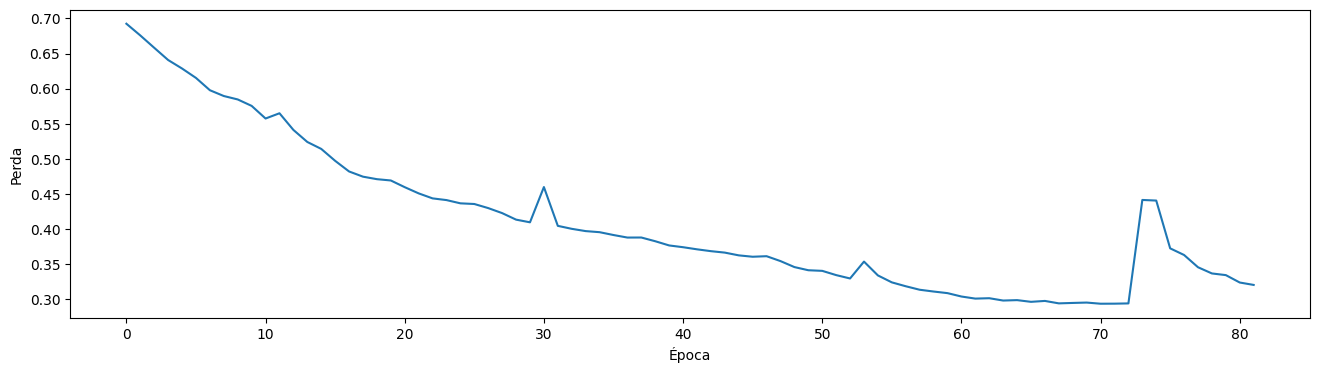

In [48]:
# Plotar o gráfico de perda durante o treinamento
plt.figure(figsize=(16, 4))
plt.plot(mlp.loss_curve_)
plt.xlabel("Época")
plt.ylabel("Perda")
plt.show()

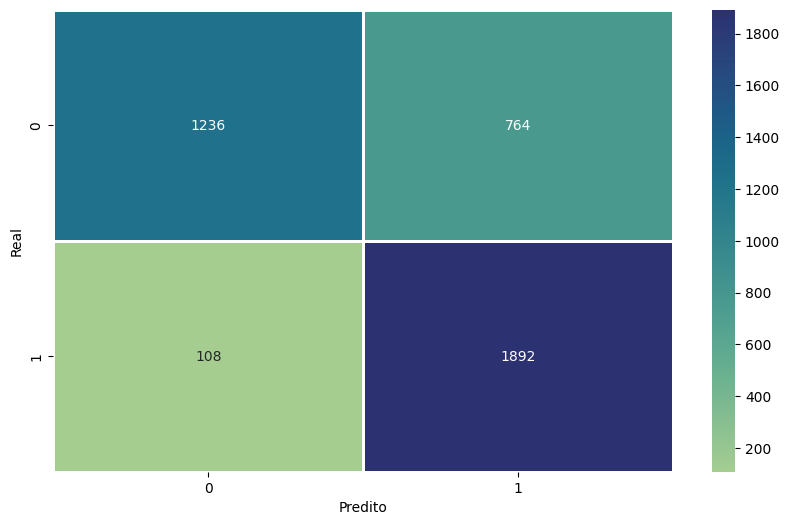

In [49]:
# Calcular e exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, linewidth=.8, cmap="crest", fmt='g')
plt.ylabel("Real")
plt.xlabel("Predito")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


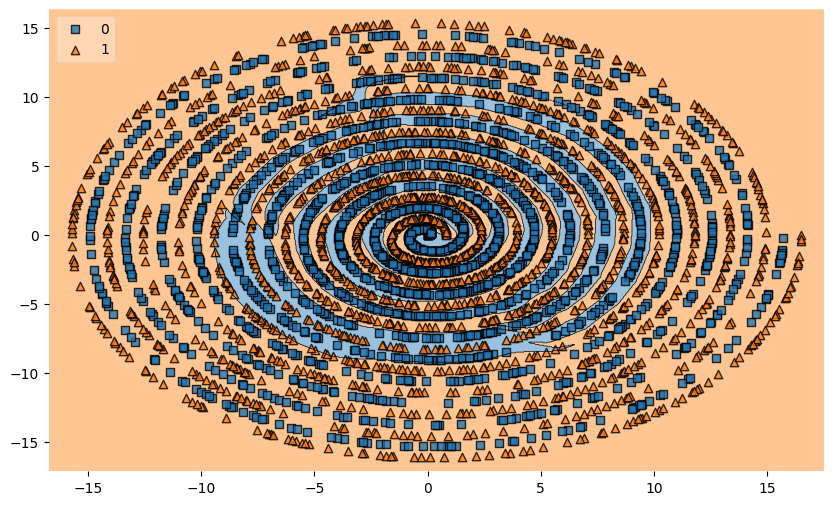

In [52]:
# Plotar as regiões de decisão com mais pontos de teste
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test.values, y_test.values.astype(np.int_), clf=mlp, legend=2)
plt.show()


## 9.3

Considere o problema de classificação de padrões bidimensionais constituído neste
caso de 5 padrões. A distribuição dos padrões tem como base um quadrado centrado na
origem interceptando os eixos nos pontos +1 e -1 de cada eixo. Os pontos +1 e -1 de cada
eixo são centros de quatro semicírculos que se interceptam no interior do quadrado originando uma classe e as outras quatro classes nas regiões de não interseção. Após gerar aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto
de treinamento e um conjunto de validação. Treine uma rede perceptron para classificar os
padrões associados a cada uma das classes. Verifique o desempenho do classificador usando o conjunto de validação e calculando a matriz de confusão.

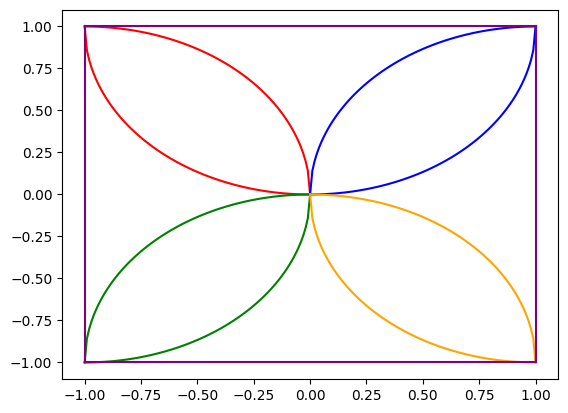

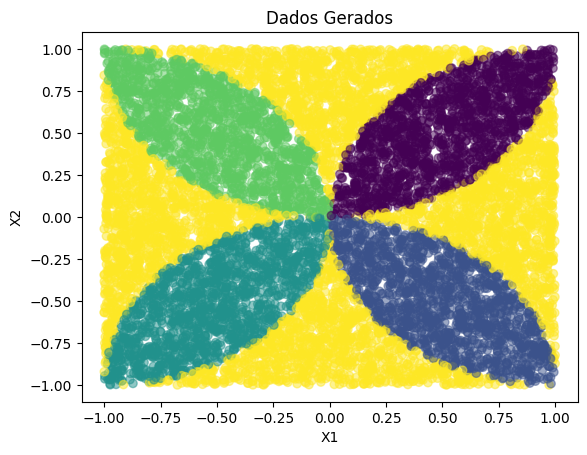

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Função para plotar o problema
def plot_problem():
    xp = np.linspace(0, 1, 100) # Espaço de pontos x>0
    xm = np.linspace(-1, 0, 100) # Espaço de pontos x<0

    ycm = -np.sqrt(1 - xm**2) + 1 # Curva superior direta
    ycp = -np.sqrt(1 - xp**2) + 1 # Curva superior esquerda
    ybm = np.sqrt(1 - xm**2) - 1 # Curva inferior esquerda
    ybp = np.sqrt(1 - xp**2) - 1 # Curva superior direita
    ydc = np.sqrt(1 - (xp - 1)**2) # Curva direita superior
    ydb = -np.sqrt(1 - (xp - 1)**2) # Curva direita inferior
    yeb = -np.sqrt(1 - (xm + 1)**2) # Curva esquerda inferior
    yec = np.sqrt(1 - (xm + 1)**2) # Curva esquerda superior

    plt.plot(xm, ycm, 'r') # Curva superior direta
    plt.plot(xm, yec, 'r') # Curva esquerda superior
    plt.plot(xp, ycp, 'b') # Curva superior esquerda
    plt.plot(xp, ydc, 'b') # Curva direita superior
    plt.plot(xm, ybm, 'g') # Curva inferior esquerda
    plt.plot(xm, yeb, 'g') # Curva esquerda inferior
    plt.plot(xp, ybp, 'orange') # Curva superior direita
    plt.plot(xp, ydb, 'orange') # Curva direita inferior

    # Plot do quadrado
    plt.plot([-1, -1], [-1, 1], 'purple')
    plt.plot([1, 1], [-1, 1], 'purple')
    plt.plot([-1, 1], [-1, -1], 'purple')
    plt.plot([-1, 1], [1, 1], 'purple')

    plt.show()

# Função para gerar os dados
def generate_data(num_samples):
    X = np.zeros((num_samples, 2))
    y = np.zeros(num_samples, dtype=int)

    for i in range(num_samples):
        x1 = np.random.uniform(-1, 1)
        x2 = np.random.uniform(-1, 1)

        if x1 >= 0 and x1 <=1:
            if x2 >= -np.sqrt(1-x1**2)+1 and x2 <= np.sqrt(1-(x1-1)**2):
                y[i] = 1
            elif x2 >= -np.sqrt(1-(x1-1)**2) and x2 <= np.sqrt(1-x1**2)-1:
                y[i] = 2
            else:
                y[i] = 5
        elif x1 >=-1 and x1 <0:
            if x2 >= -np.sqrt(1-(x1+1)**2) and x2 <= np.sqrt(1-x1**2)-1:
                y[i] = 3
            elif x2 >= -np.sqrt(1-x1**2)+1 and x2 <= np.sqrt(1-(x1+1)**2):
                y[i] = 4
            else:
                y[i] = 5
        else:
            y[i] = 5

        X[i] = [x1, x2]

    return X, y

# Gerar dados
num_samples = 10000
X, y = generate_data(num_samples)

# Plotar problema e dados gerados
plot_problem()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dados Gerados')
plt.show()

In [9]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Construir o modelo da rede neural
model = Sequential([
    Dense(50, activation='relu', input_shape=(2,)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(6, activation='softmax')  # Camada de saída
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=500, batch_size=500, validation_data=(X_test, y_test), verbose=0)

# Avaliar o modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Test Loss: 0.052764151245355606
Test Accuracy: 0.9773749709129333


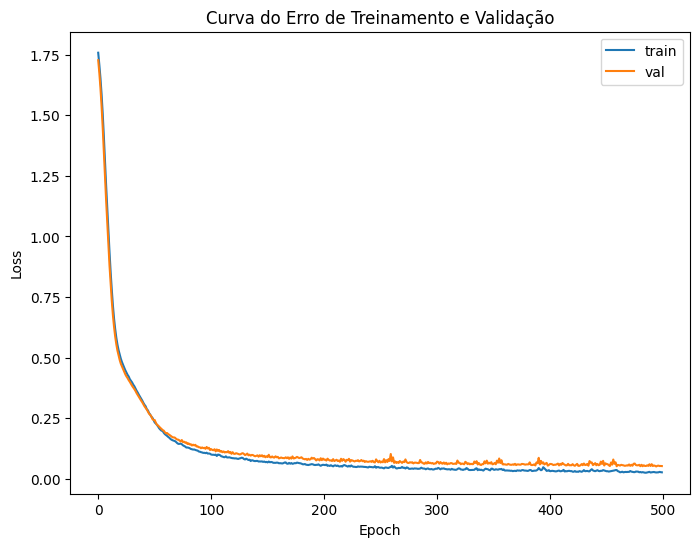

In [13]:
# Visualizar a curva do erro de treinamento e validação
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Curva do Erro de Treinamento e Validação')
plt.show()

250/250 [==============================] - 1s 4ms/step
Confusion Matrix:
[[1133    0    0    0   28]
 [   0 1094    0    0   14]
 [   0    0 1129    0    6]
 [   0    0    1 1079   31]
 [  13   29   37   22 3384]]


Text(0.5, 14.722222222222216, 'Predicted')

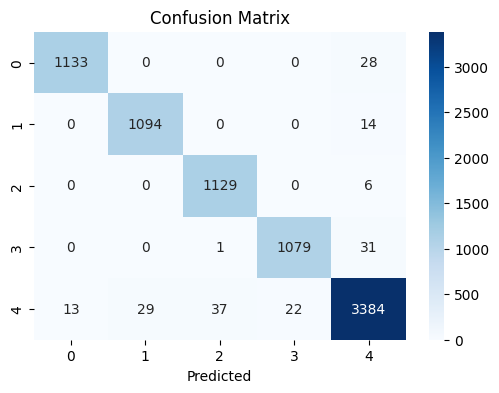

In [10]:
# Gerar previsões
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calcular matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Plotar matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')

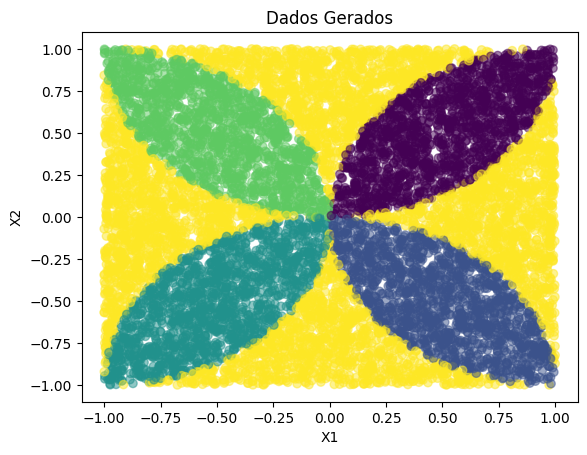

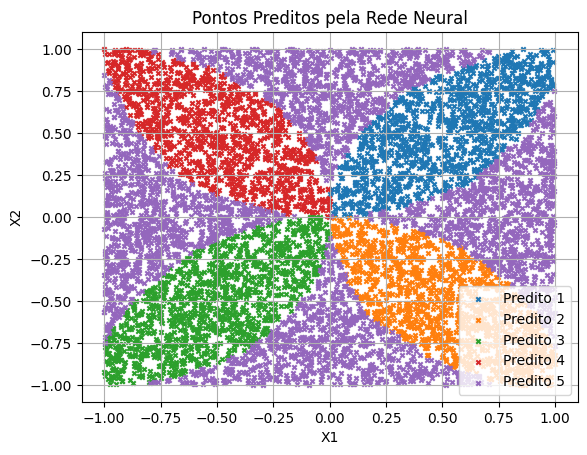

In [12]:
# Novamente mostrando os pontos gerados inicialmente
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dados Gerados')
plt.show()

for label in range(1, 6):
    plt.scatter(X_test[y_pred_labels == label][:, 0], X_test[y_pred_labels == label][:, 1], label=f'Predito {label}', marker='x', s=10)

# Mostrando os pontos gerados pela rede
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Pontos Preditos pela Rede Neural')
plt.grid(True)
plt.legend()
plt.show()